<a href="https://colab.research.google.com/github/sohaibalam1994/Internship-work/blob/main/Internship_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###Google drive must be mounted when running any modelling-relevant code

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
# Get label classes
from itertools import chain
import seaborn as sns
# data conversion
from os import listdir
# general
import numpy as np
import pandas as pd
import sys
import os
import gc
# from PIL import Image
import matplotlib.pyplot as plt 
# from pandas import read_csv
from matplotlib.image import imread
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score
#from matplotlib.offsetbox import OffsetImage, AnnotationBbox

### Uploding files from main disc



In [18]:
from google.colab import files
uploaded = files.upload()

Saving train_v2.csv to train_v2 (2).csv


###Data includes: jpg images, tif images, csv file

In [7]:
import io
map_csv = pd.read_csv(io.BytesIO(uploaded['train_v2.csv']))
map_csv.values
print("There are {} images, and {} columns in the label file.".format(map_csv.shape[0], map_csv.shape[1]))
print(map_csv.head())
print('-' * 60)
print(map_csv.tail())

There are 40479 images, and 2 columns in the label file.
  image_name                                       tags
0    train_0                               haze primary
1    train_1            agriculture clear primary water
2    train_2                              clear primary
3    train_3                              clear primary
4    train_4  agriculture clear habitation primary road
------------------------------------------------------------
        image_name                                           tags
40474  train_40474                                  clear primary
40475  train_40475                                         cloudy
40476  train_40476                      agriculture clear primary
40477  train_40477                 agriculture clear primary road
40478  train_40478  agriculture cultivation partly_cloudy primary


### Checking the labels and classes in the training set

In [8]:
labels_df = map_csv = pd.read_csv(io.BytesIO(uploaded['train_v2.csv']))

labels_list = list(chain.from_iterable([tags.split(" ") for tags in labels_df['tags'].values]))
num_labels = len(labels_list)
uniq_labels = set(labels_list) 
num_uniq_labels = len(uniq_labels) 
print("There are {} labels in the training set".format(num_labels))
print("They are distributed among the {} following classes:".format(num_uniq_labels))
print(uniq_labels)

There are 116278 labels in the training set
They are distributed among the 17 following classes:
{'partly_cloudy', 'clear', 'cultivation', 'blooming', 'conventional_mine', 'habitation', 'road', 'haze', 'agriculture', 'cloudy', 'primary', 'water', 'bare_ground', 'selective_logging', 'blow_down', 'artisinal_mine', 'slash_burn'}


### Plotting the Graph by using seaborn

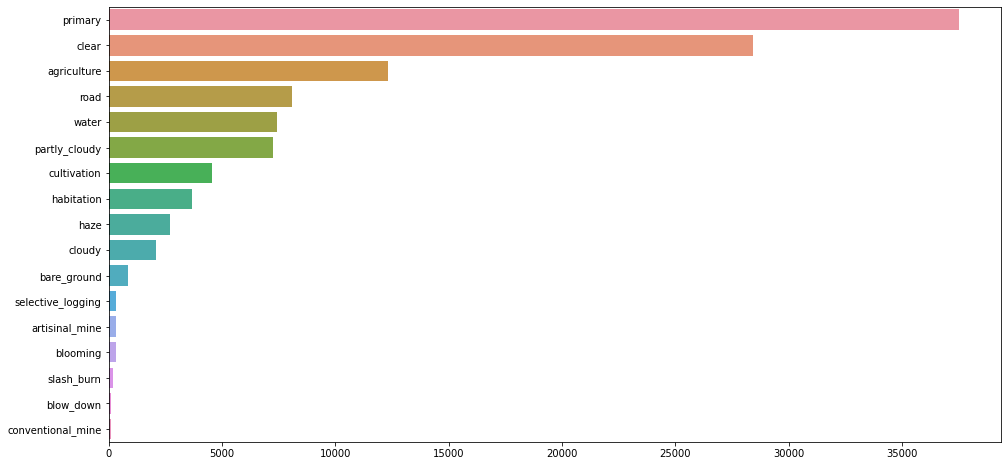

In [9]:
# Histogram of label instances
labels_s = pd.Series(labels_list).value_counts() # To sort them by count
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=labels_s, y=labels_s.index, orient='h')
plt.show()

### Visualizing the images of the train data with clearity type

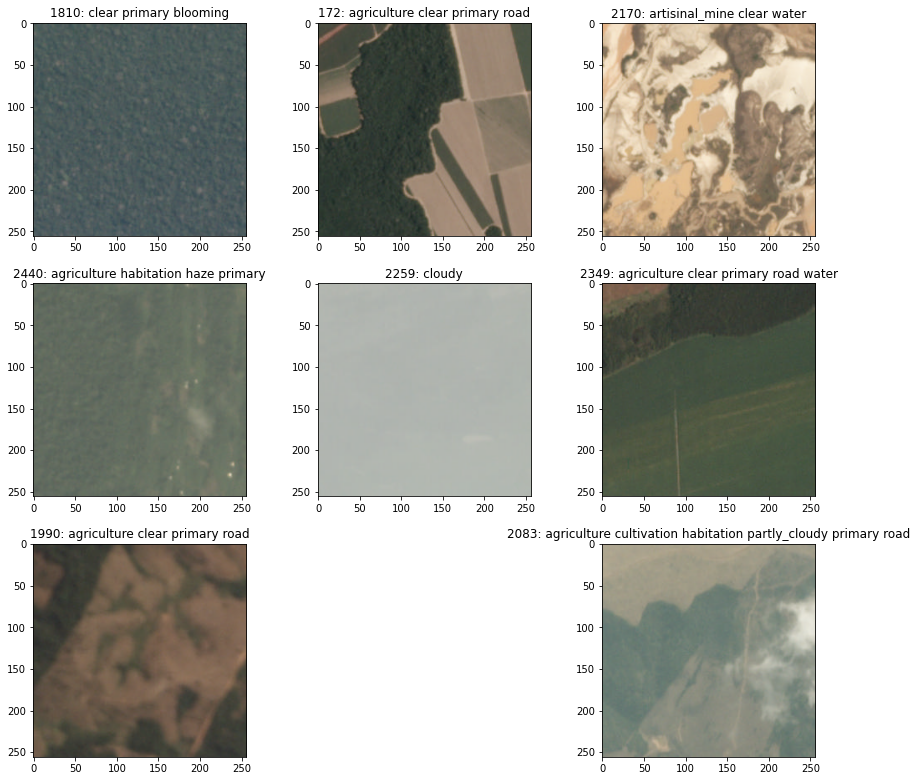

In [10]:
select = [1810, 172, 2170, 2440, 2259, 2349, 1990, 1361, 2083]
imgs_ls = []
for ind in select:
    # temp_path = '/content/drive/My Drive/dl_final_data/train-jpg/train_{}.jpg'\
    temp_path = '/content/drive/My Drive/Dataset/Train_data/train_{}.jpg'\
                .format(str(ind))
    imgs_ls.append(temp_path)

plt.figure(figsize=(12,11))
for j in range(9): 
    plt.subplot(3, 3, j + 1)
    plt.imshow(plt.imread(imgs_ls[j]))
    plt.title("{}: {}".format(select[j], map_csv['tags'][select[j]]))
    plt.tight_layout()
plt.show()

### Showing one image only

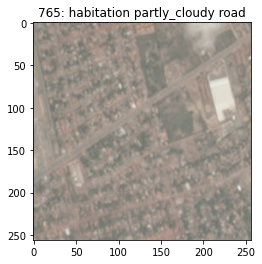

In [16]:
manual_path = '/content/drive/My Drive/Dataset/Train_data/train_765.jpg'
manual_path 
dex = manual_path.split("train_")[1].split('.')[0]
plt.imshow(plt.imread(manual_path))
plt.title("{}: {}".format(dex, map_csv['tags'][int(dex)]))
plt.show()

temp_path = '/content/drive/My Drive/Dataset/Train_data/train_765.jpg'